In [36]:
import numpy as np
import matplotlib.pyplot as plt

tau=100e-6
E=4


In [37]:
def impulse_1(t, E, tau):
    if abs(t)>tau/2:
        return 0.0
    return E

def spectrum_1(f, E, tau):
    if np.isclose(f, 0):
        return E*tau/2
    return E*tau*np.sin(np.pi*f*tau)/(np.pi*f*tau)

def impulse_2(t, E, tau):
    if abs(t-tau/2)>tau/2:
        return 0.0
    return E

def spectrum_2(f, E, tau):
    return abs(spectrum_1(f, E, tau))

def impulse_3(t, E, tau):
    if abs(t)>tau/2:
        return 0.0
    return E*np.cos(np.pi*t/tau)

def spectrum_3(f, E, tau):
    return E*tau/np.pi*2*np.cos(np.pi*f*tau)/(1-(2*f*tau)**2)

def impulse_4(t, E, tau):
    if abs(t-tau/2)>tau/2:
        return 0.0
    return E*np.cos(np.pi*t/tau)

def spectrum_4(f, E, tau):
    return abs(4*f*tau**2*E*np.cos(np.pi*f*tau)/(np.pi*(4*f**2*tau**2-1)))

def impulse_5(t, E, tau):
    if abs(t)>tau/2:
        return 0.0
    return 1/2*(1+np.cos(2*np.pi*t/tau))

def spectrum_5(f, E, tau):
    return np.sin(np.pi*f*tau)/(1-f**2*tau**2)/(2*np.pi*f)

def impulse_6(t, E, tau):
    if abs(t-tau/2)>tau/2:
        return 0.0
    return 1/2*(1+np.cos(2*np.pi*t/tau))

def spectrum_6(f, E, tau):
    return abs((2*(f*tau)**2-1)*np.sin(np.pi*f*tau)/((f*tau)**2-1)/(2*np.pi*f))

In [38]:
impulses = [impulse_1, impulse_2, impulse_3, impulse_4, impulse_5, impulse_6]
spectrums = [spectrum_1, spectrum_2, spectrum_3, spectrum_4, spectrum_5, spectrum_6]

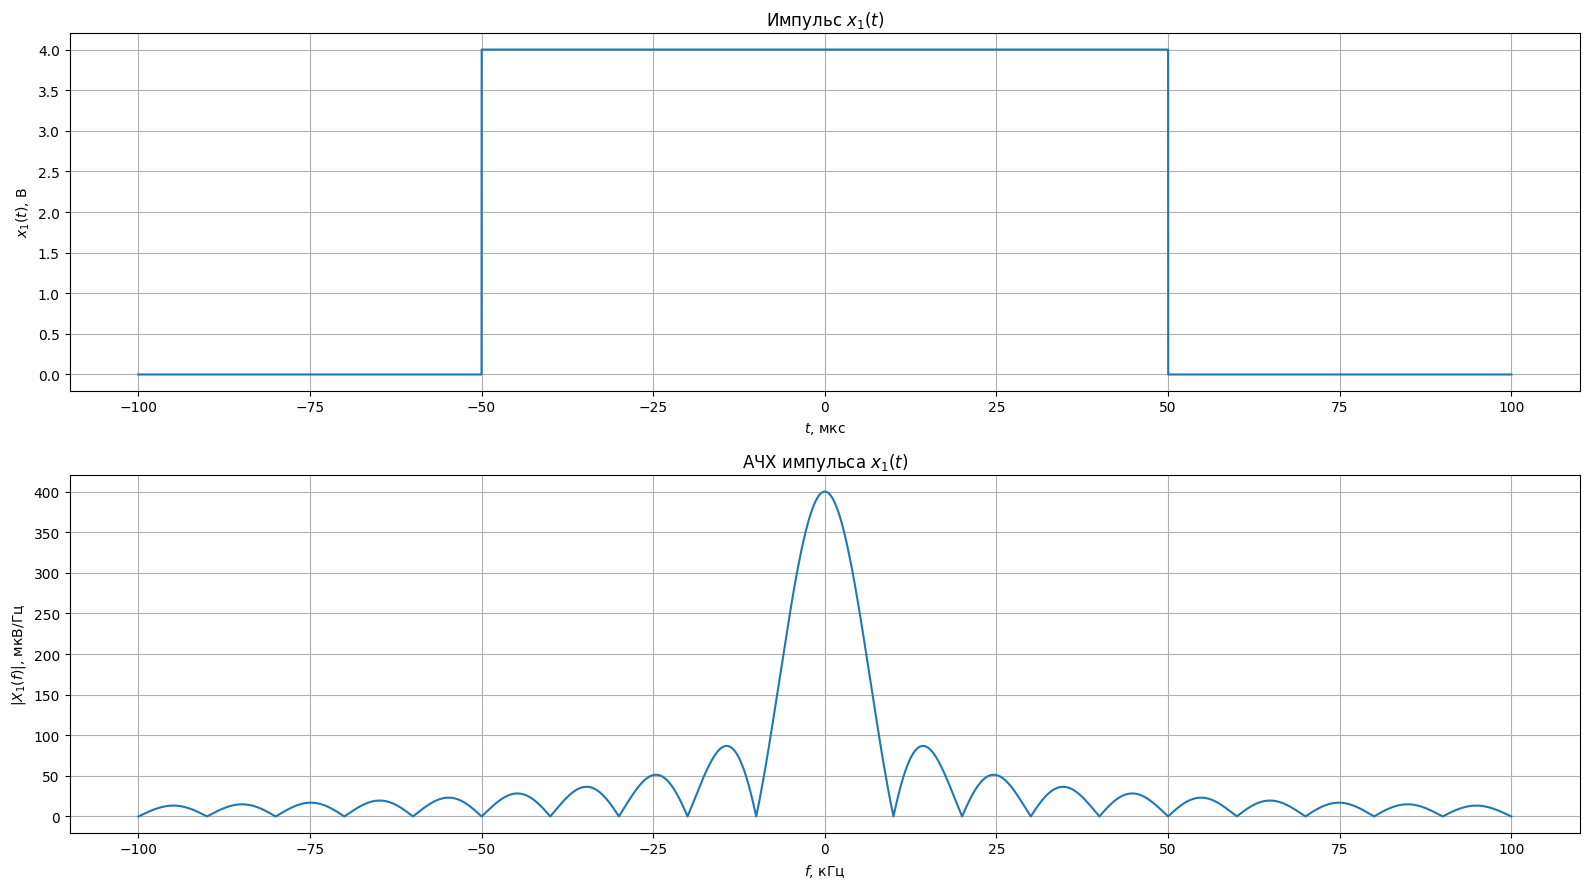

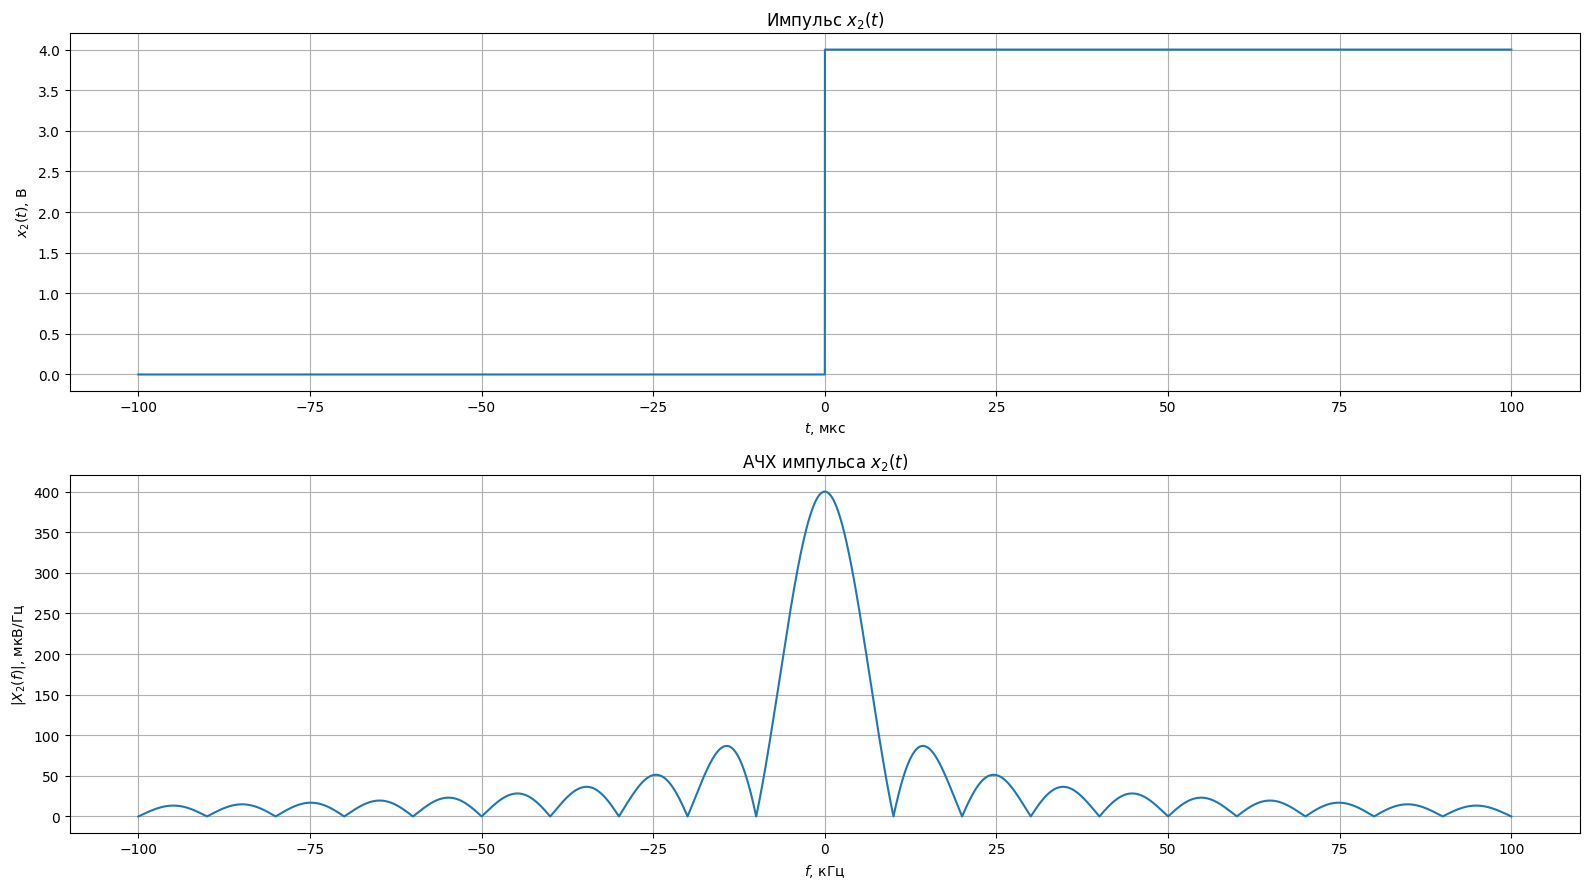

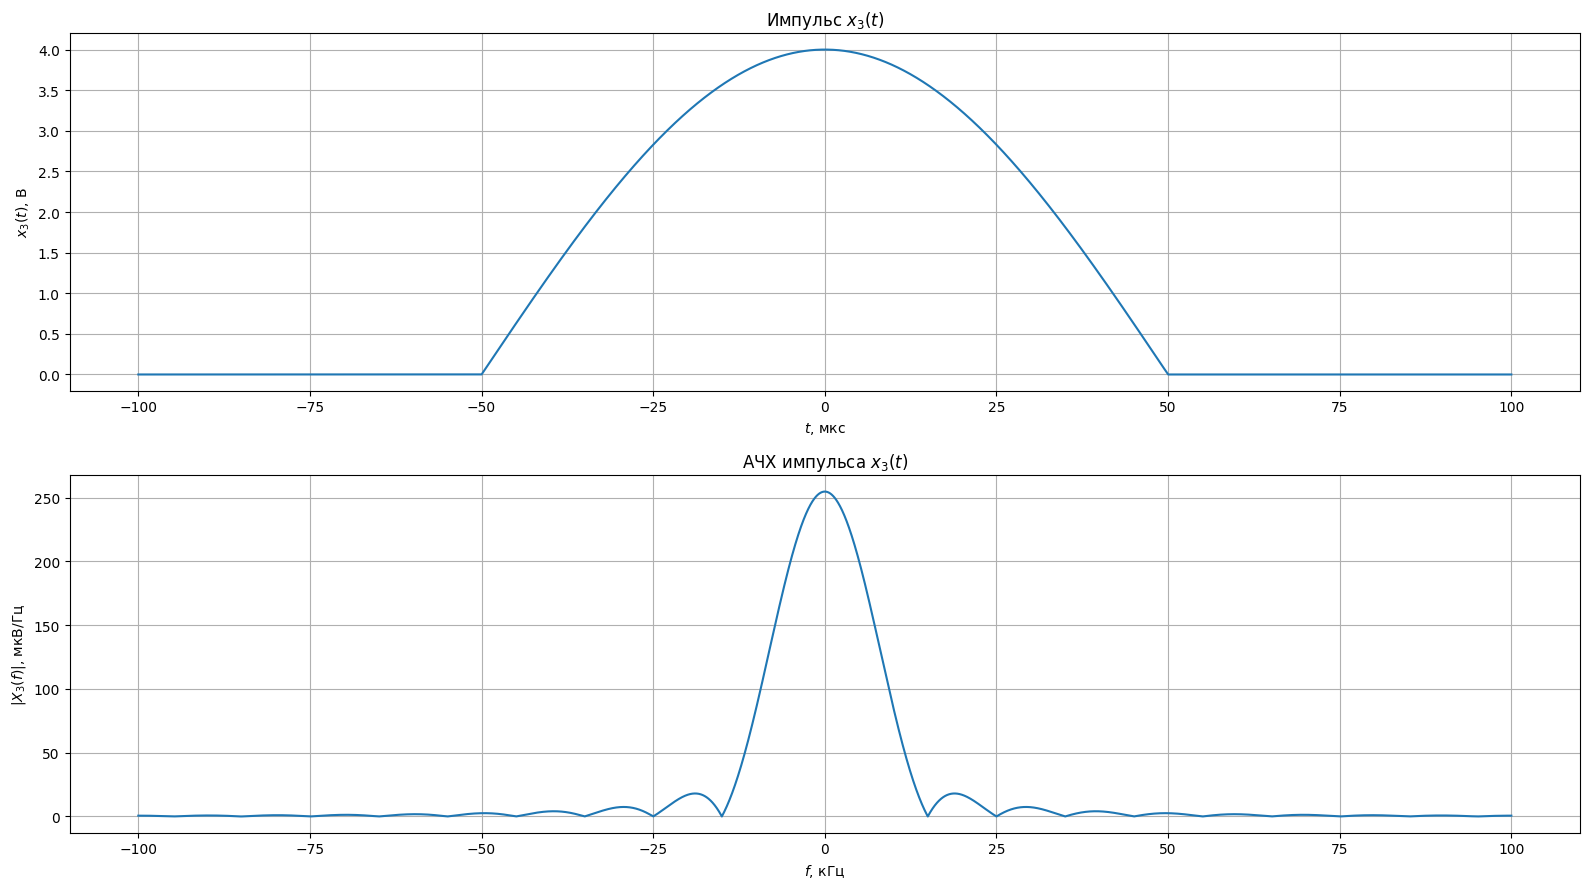

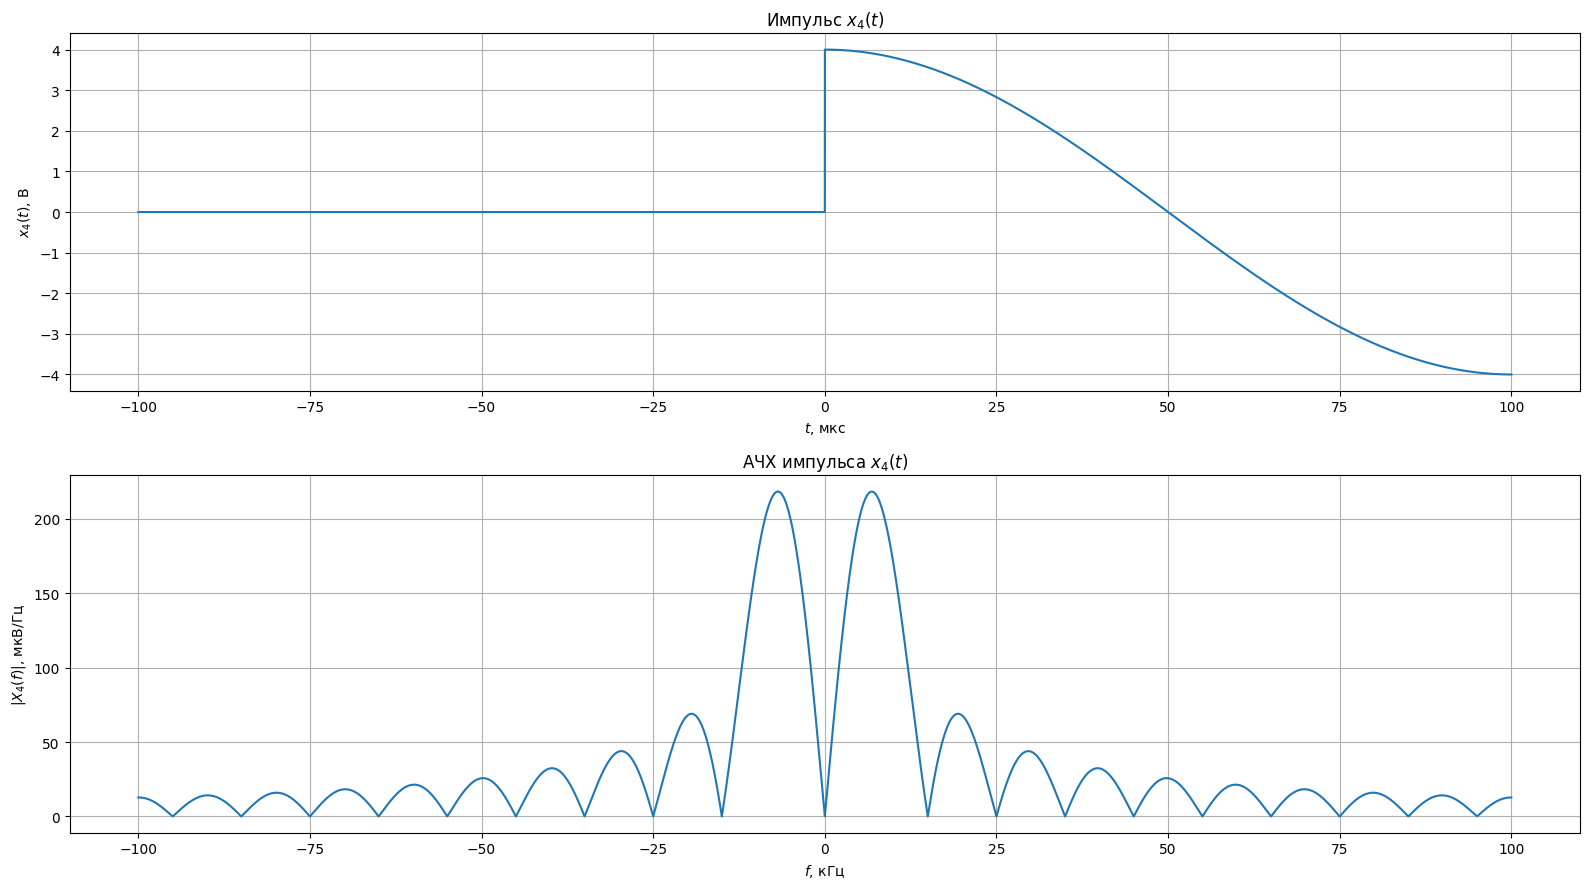

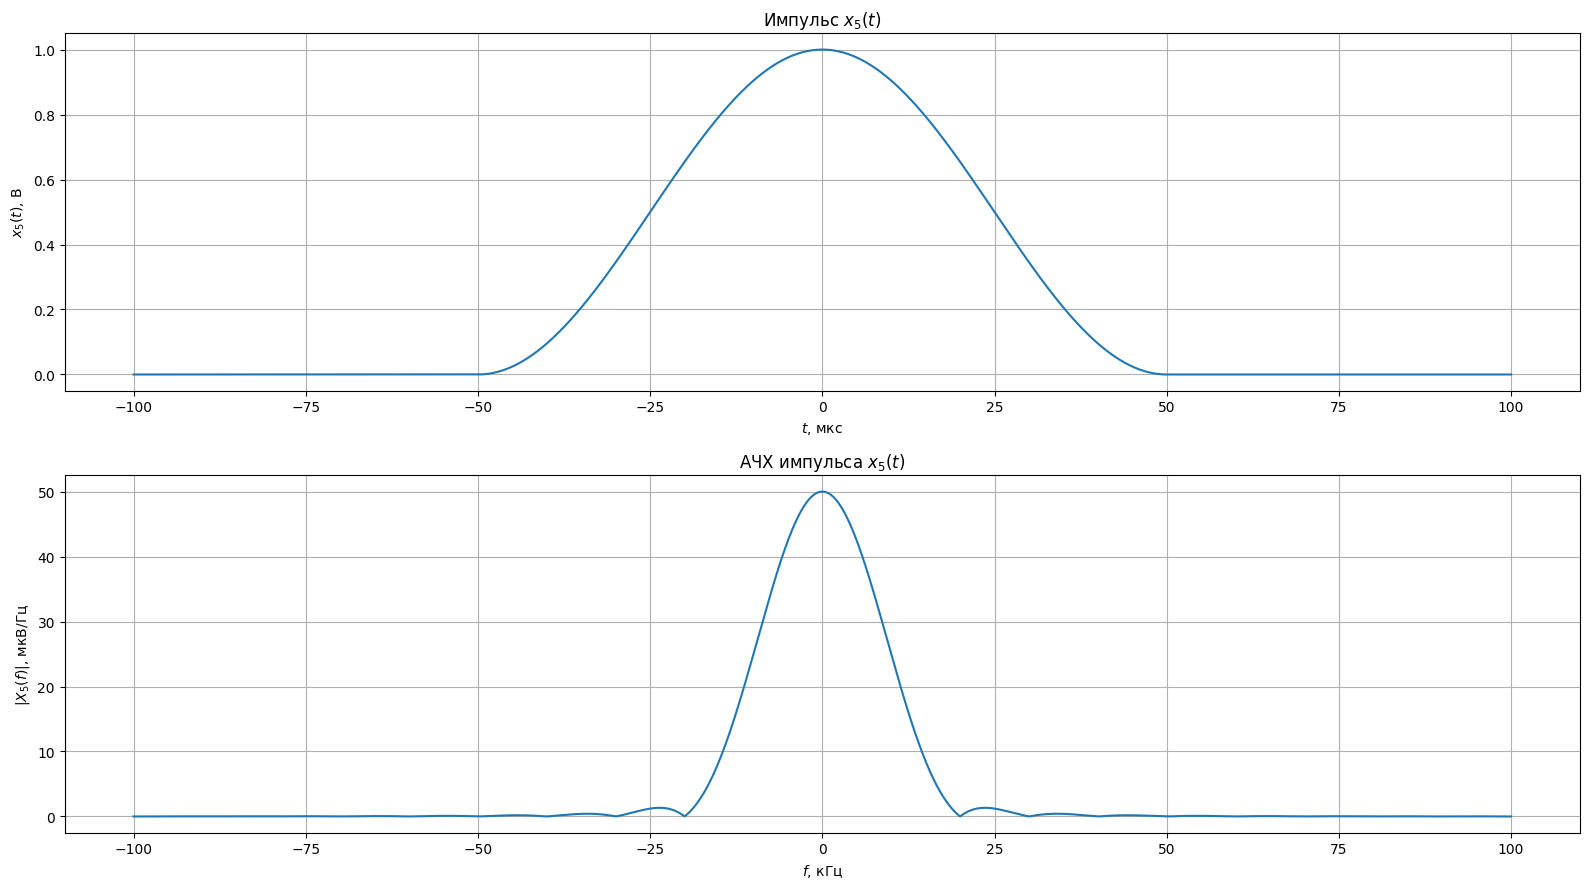

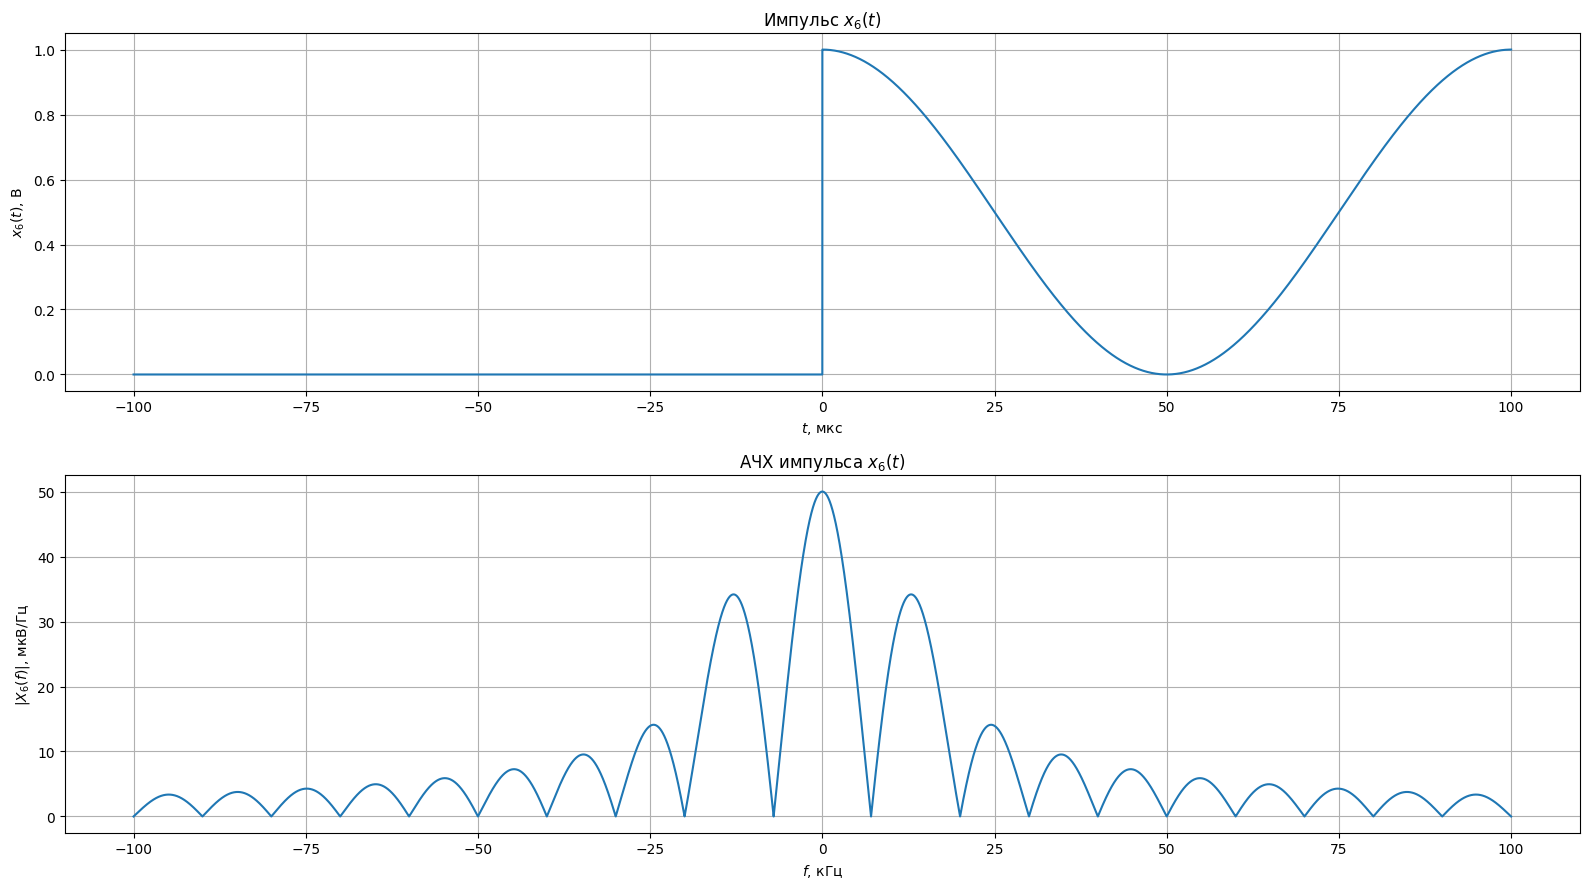

In [39]:
t_band = np.linspace(-tau, tau, num=2**15)
f_band = np.linspace(-10/tau, 10/tau, num=2**15)

for num in range(1, 7):

    x = np.array([impulses[num-1](t, E, tau) for t in t_band])
    Xf = np.array([spectrums[num-1](f, E, tau) for f in f_band])
    plt.figure(figsize=(16,9))
    plt.subplot(2, 1, 1)
    plt.plot(t_band*1e6, x)
    plt.title(f"Импульс $x_{num}(t)$")
    plt.xlabel("$t$, мкc")
    plt.ylabel(f"$x_{num}(t)$, В")
    plt.tight_layout()
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.title(f"АЧХ импульса $x_{num}(t)$")
    plt.plot(f_band*1e-3, abs(Xf)*1e6)
    plt.ylabel(f"$|X_{num}(f)|$, мкВ/Гц")
    plt.xlabel("$f$, кГц")
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"pic_{num}")